In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import tree_plotter
from copy import deepcopy

In [26]:
data = pd.read_csv('TrainData.csv')
traindata = data.drop(['Survived'], axis=1)
trainlables = data['Survived']

In [27]:
def cal_acc(trainlables, y_predict):
    cnt = 0
    for i in range(y_predict.shape[0]):
        if y_predict[i] == trainlables[i]:
            cnt += 1
    return float(cnt) / y_predict.shape[0]

# Decision Tree

{'Sex': {0: {'Pclass': {1: {'Age': {0: {'Embarked': {1: 1, 2: 1}}, 1: {'Embarked': {1: 1, 2: 1, 3: 1}}, 2: 1}}, 2: {'Age': {0: 1, 1: {'Embarked': {1: 1, 2: 1, 3: 1}}}}, 3: {'Embarked': {1: {'Age': {0: 0, 1: 0, 2: 1}}, 2: {'Age': {0: 1, 1: 1}}, 3: {'Age': {0: 1, 1: 1}}}}}}, 1: {'Pclass': {1: {'Age': {0: {'Embarked': {1: 1, 2: 0}}, 1: {'Embarked': {1: 0, 2: 0, 3: 0}}, 2: {'Embarked': {1: 0, 2: 0}}}}, 2: {'Age': {0: {'Embarked': {1: 1}}, 1: {'Embarked': {1: 0, 2: 0, 3: 0}}, 2: {'Embarked': {1: 0}}}}, 3: {'Embarked': {1: {'Age': {0: 0, 1: 0, 2: 0}}, 2: {'Age': {0: 0, 1: 0}}, 3: {'Age': {0: 0, 1: 0, 2: 0}}}}}}}}
The Accuracy of CartTree is:  0.8181818181818182


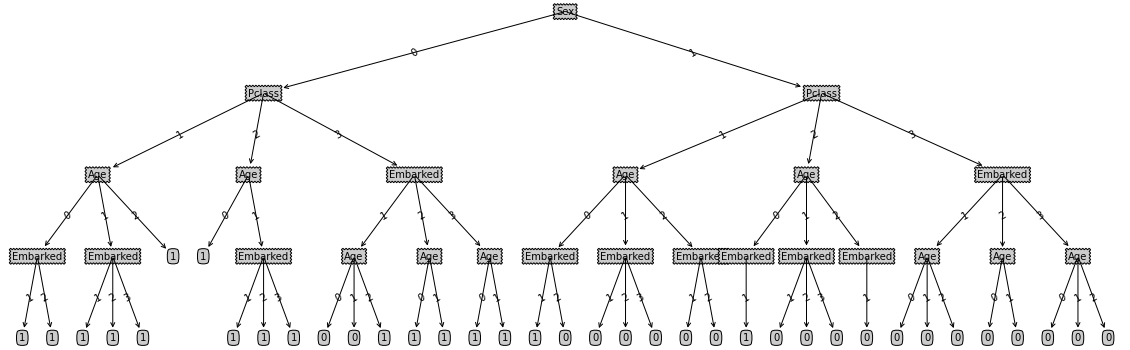

In [28]:
from decision_tree import DecisionTree

model1 = DecisionTree(Selected_method='gini', max_depth=4, min_samples_leaves=4, SampleFeature=False)
model1.fit(traindata, trainlables)
print(model1.tree)
y_predict = model1.predict(traindata)
acc = cal_acc(trainlables, y_predict)

print("The Accuracy of CartTree is: ", acc)

# Plot the decision tree to get an intuition about how it makes decision
plt.figure(figsize=(20, 6))
model1.show()

# Random Forest

In [29]:
from random_forest import RandomForest

BasicModel = DecisionTree(Selected_method='infogain_ratio', max_depth=6, min_samples_leaves=4, SampleFeature=True)
model2 = RandomForest(BasicModel=BasicModel, estimator_num=100, seed=10086)
model2.fit(traindata, trainlables)

y_predict = model2.predict(traindata)
acc = cal_acc(trainlables, y_predict)

print("The Accuracy of RandomForest is: ", acc)

The Accuracy of RandomForest is:  0.8181818181818182


# Adaboost

In [30]:
from adaboost import Adaboost

BasicModel = DecisionTree(Selected_method='entropy', max_depth=4, min_samples_leaves=4, SampleFeature=False)
model3 = Adaboost(BasicModel=BasicModel, estimator_num=100, seed=10086)
model3.fit(traindata, trainlables)

y_predict = model3.predict(traindata)
acc = cal_acc(trainlables, y_predict)

print("The Accuracy of Adaboost is: ", acc)

The Accuracy of Adaboost is:  0.8181818181818182
